In [40]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import scipy.optimize as sp
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

Optimizacón ejercicio 2 

In [41]:
p = [0, 0, 0]
f = lambda x: x[0]**2 + x[1]**2 + x[2]**2 - 2*x[2] + 1
restri = ({'type': 'eq', 'fun': lambda x: 2*x[0] - 4*x[1] + 5*x[2] - 2})
resultado = sp.minimize(f, p, constraints=restri)
print(resultado)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.19999999998923168
       x: [-1.333e-01  2.667e-01  6.667e-01]
     nit: 4
     jac: [-2.667e-01  5.333e-01 -6.667e-01]
    nfev: 16
    njev: 4


Generales de probabilidad ejercicio 4 

1.4549552156187023e-157


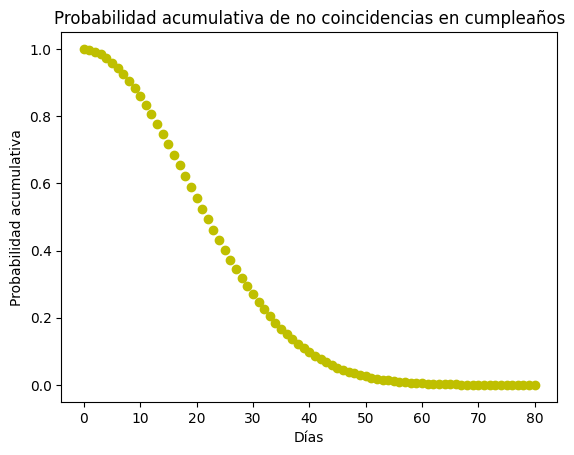

In [42]:
probabilidad = 1
probabilidades = []

for i in range(365):
    probabilidad *= (365 - i) / 365
    probabilidades.append(probabilidad)

print(probabilidad)

n = range(81)
plt.scatter(n, probabilidades[:81], color="y")


plt.xlabel("Días")
plt.ylabel("Probabilidad acumulativa")
plt.title("Probabilidad acumulativa de no coincidencias en cumpleaños")
plt.show()

Distribuciones continuas de probabilidad ejercicio 1 

In [43]:
x = sym.symbols('x')
y = sym.symbols('y')

def Func(x, y):
    return (2/3) * (x + 2*y)

f1 = Func(x, y)

#a 
a = sym.integrate(sym.integrate(f1, (x, 0, 1)), (y, 0, 1))
print("Integral sobre todo el espacio:", a)

#b 
g = sym.integrate(f1, (y, 0, 1))
h = sym.integrate(f1, (x, 0, 1))
print("Distribuciones marginales de g y h: ", g, h)

#c 
Ex=sym.integrate(g*x,(x,0,1))
print ("E_x: ", Ex)

#d 
Ey= sym.integrate(h * y, (y, 0, 1))
print("E_y", Ey)
#e 
Exy= sym.integrate(f1 * x * y, (x, 0, 1), (y, 0, 1))
cov1 = Exy-Ex*Ey
print("Covarianza por el método uno: ", cov1)

#f 
cov2= sym.integrate((x-Ex)*(y-Ey)*f1,(x,0,1),(y,0,1))
print ("Covarianza por el método dos : ", cov2)

#g 
print("x e y son variables independientes debido a que la covarianza es muy cercana a cero.")


Integral sobre todo el espacio: 1.00000000000000
Distribuciones marginales de g y h:  0.666666666666667*x + 0.666666666666667 1.33333333333333*y + 0.333333333333333
E_x:  0.555555555555556
E_y 0.611111111111111
Covarianza por el método uno:  -0.00617283950617281
Covarianza por el método dos :  -0.00617283950617284
x e y son variables independientes debido a que la covarianza es muy cercana a cero.


Hidden Markov models ejercicio 1 

In [44]:
States = np.array([0,1]) 
Prior =  np.array([0.2,0.8])

T = np.array([[0.8,0.2],[0.2,0.8]])

E = np.array([[0.5,0.9],[0.5,0.9]])


DictH = {0:'justa',1:'biast'}
DictO = {0:'cara',1:'sello'} 


Obs = np.array([1,0,0,0,1,0,1,0])

def GetStates(States,N):
    
    CStates = list( combinations_with_replacement(States,N) )

    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))

        for i in p:
            if i not in Permu:
                Permu.append(i)
                
    return np.array(Permu)
HiddenStates = GetStates(States,8)

def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0]]
    

    for i in range(n-1):
        p *= T[ State[i+1], State[i]  ]
        
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
        
    return p
P = np.zeros(HiddenStates.shape[0], dtype=np.float64)

for i in range(P.shape[0]):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)
    
valor=np.amax(P)
mayor_probabilidad=np.where(P==valor)
print(HiddenStates[mayor_probabilidad[0]])

ObsStates = GetStates([0,1,2],8)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 1), (0, 1, 2), (0, 2, 2), (1, 1, 1), (1, 1, 2), (1, 2, 2), (2, 2, 2)]
Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
        
    PObs[j] = np.sum(P)

print(np.sum(PObs))


[[1 1 1 1 1 1 1 1]]
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\laura\AppData\Local\Temp\ipykernel_17164\1385211944.py", line 56, in <module>
    ObsStates = GetStates([0,1,2],8)
                ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\laura\AppData\Local\Temp\ipykernel_17164\1385211944.py", line -1, in GetStates
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\IPython\core\ultratb.py", line 1428, in structured_traceback
    return FormattedTB.struct

Mínimos cuadrados 1b 

Punto de mínimo: [1.46464646 0.45454545]


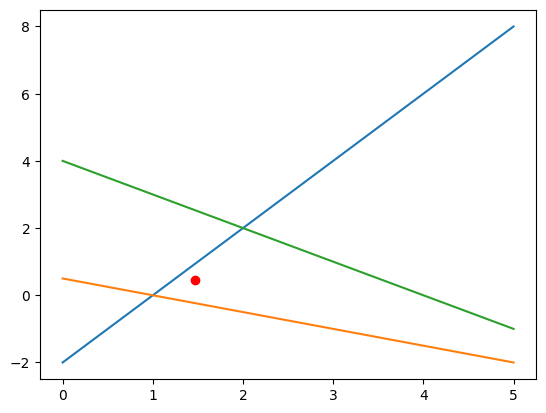

In [ ]:
lineas =np.array([[2,-1],[1,2],[1,1]])
y=np.array([2,1,4])
tm=np.linspace(0,5,100)

rango = np.linspace(-5, 5, 100)
v_2 = np.zeros(2)

def recta1(tm):
  return 2*tm-2
def recta2(tm):
  return (1-tm)/2
def recta3(tm):
  return 4-tm

resultado = np.zeros((1, 3))  
normas = float('inf')
ubp = np.zeros(2)
normas2 = np.zeros(10000)


for i in range(len(rango)):
    for j in range(len(rango)):
        v_2[0], v_2[1] = rango[i], rango[j]
        z1 = lineas @ v_2 - y
        actual = np.linalg.norm(z1)

        if actual < normas:
            normas = actual
            ubp[0], ubp[1] = rango[i], rango[j]

        resultado = np.append(resultado, [z1], axis=0)


for i in range(10000):
    normas2[i] = np.linalg.norm(resultado[i])


print("Punto de mínimo:", ubp)


plt.plot(tm, recta1(tm))
plt.plot(tm, recta2(tm))
plt.plot(tm, recta3(tm))
plt.scatter(ubp[0], ubp[1], color="r")
plt.show()
